In [1]:
!pip install yfinance scikit-learn

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
#Select Stock & Load Historical Data
stock_symbol = "AAPL"   # Apple

data = yf.download(stock_symbol, start="2018-01-01", end="2024-01-01")
data.head()


/tmp/ipython-input-1902265359.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock_symbol, start="2018-01-01", end="2024-01-01")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2018-01-02,40.341881,40.351250,39.639305,39.850080,102223600
2018-01-03,40.334866,40.878192,40.271636,40.405124,118071600
2018-01-04,40.522209,40.625254,40.299728,40.407454,89738400
2018-01-05,40.983582,41.070231,40.526908,40.618243,94640000
2018-01-08,40.831348,41.126429,40.732985,40.831348,82271200


In [5]:
#Feature Selection & Target Creation
#Features: Open, High, Low, Volume
#Target: Next day’s Close price

# Create target: next day's closing price
data["Next_Close"] = data["Close"].shift(-1)

# Drop last row (target becomes NaN)
data.dropna(inplace=True)

X = data[["Open", "High", "Low", "Volume"]]
y = data["Next_Close"]


In [6]:
#Train-Test Split (shuffle=False preserves time order, important for stock data)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

In [7]:
#Train the Model (Linear Regression)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [9]:
#Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 6.890038804235491
R² Score: 0.981928339531257


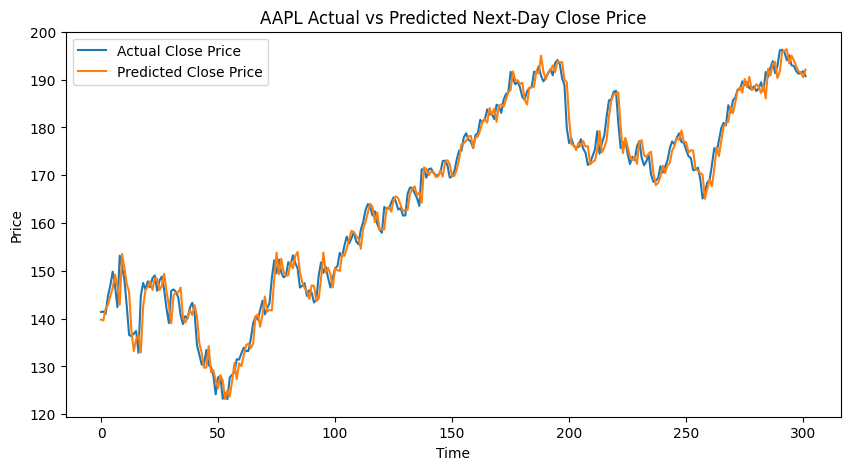

In [11]:
#Plot Actual vs Predicted Closing Prices
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label="Actual Close Price")
plt.plot(y_pred, label="Predicted Close Price")
plt.title(f"{stock_symbol} Actual vs Predicted Next-Day Close Price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()


Mean Squared Error: 72.18008236632713
R² Score: 0.8106811908913621


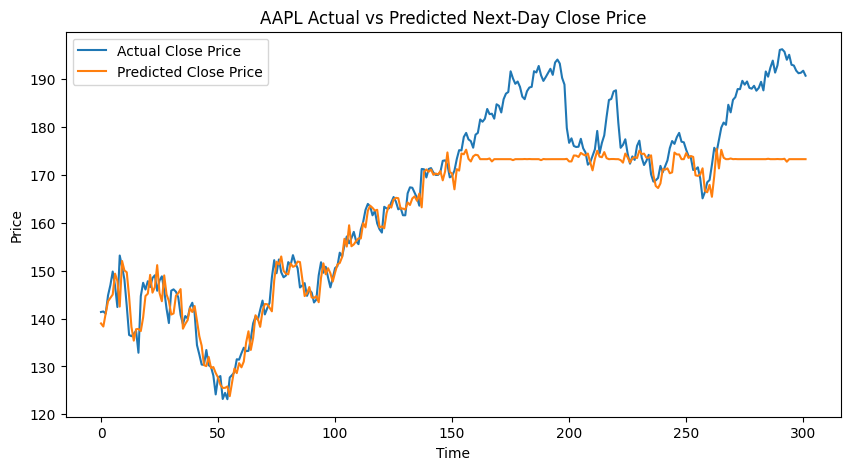

In [13]:
# Using Random Forest Instead
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label="Actual Close Price")
plt.plot(y_pred, label="Predicted Close Price")
plt.title(f"{stock_symbol} Actual vs Predicted Next-Day Close Price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()


Linear Regression outperformed Random Forest for next-day stock price prediction, achieving a lower MSE (6.89) and higher R² (0.98). This indicates that short-term stock prices exhibit strong linear dependency on Open, High, and Low values. Random Forest showed inferior performance due to noise sensitivity and lack of temporal modeling.